In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os as os
from astropy.io import fits as fits
from astropy.coordinates import SkyCoord, EarthLocation
import math

In [2]:
#constants
gaia_bands = {'R':(6200,9000),
              'B':(4500,6500),
              'G':(4500,8000)}
DATA_PATH = 'Data/spec1d_science_stars'


In [3]:
#function for plot configuration
def InitializePlot():
    plt.clf()
    plt.xlim()
    plt.ylim()
    plt.xlabel('')
    plt.ylabel('')
    plt.rcParams['font.family']='serif'
    plt.rcParams['font.size']=14

In [4]:
#photometry (gaia) data import % assignment
photometrydata = np.genfromtxt('Data/HALO7D_Gaia_possible_targets_photometry.dat',skip_header=1,dtype=['U16','U16','U16','<f8','<f8','<f8'], names=['id','ra','dec','gaiaG','gaiaB','gaiaR'])
idname = photometrydata['id']
ra = photometrydata['ra']
dec = photometrydata['dec']
gaia_g = photometrydata['gaiaG']
gaia_b = photometrydata['gaiaB']
gaia_r = photometrydata['gaiaR']
#switching idname to list for versatility later
name = list(idname)

In [5]:
#returns list of all distinct mask names identified from spec1d filenames
def findMasks():
    masks = []
    for filename in os.listdir(DATA_PATH):
        if not filename[7:12] in masks:
            masks.append(filename[7:12])
    return masks
        

In [6]:
#returns dictionary of all filenames sorted into masks
#dictionary structure: [mask][filename]
def allocateStars(masknames):
    masks = {}
    for mask in masknames:
        masks[mask] = []
    
    for filename in os.listdir(DATA_PATH):
        for mask in masknames:
            if filename[7:12] == mask:
                masks.get(mask).append(filename)
    return masks

In [7]:
#identifies masknames and sorts spec1d filepaths by mask
masknames = findMasks()
masks = allocateStars(findMasks())

In [8]:
#reads all spec1d files of a certain mask and returns data relevent for R band plots
def getDataR(mask):
    data = []
    
    for filename in mask:
        index = name.index(filename[17:33])
        filepath = 'Data/spec1d_science_stars/' + filename
        with fits.open(filepath) as fits_data:
            blue_data = fits_data[1].data
            red_data = fits_data[2].data
            data_specs = blue_data.field('SPEC').tolist() + red_data.field('SPEC').tolist()
            data_lambdas = blue_data.field('LAMBDA').tolist() + red_data.field('LAMBDA').tolist()
            data_spec = [item for sublist in data_specs for item in sublist]
            data_lambda = [item for sublist in data_lambdas for item in sublist]
            
            median_computation_spec = []
            median_computation_lambda = []
            for i, j in enumerate(data_spec):
                if data_lambda[i] >= gaia_bands['R'][0] and data_lambda[i] <= gaia_bands['R'][1]:
                    median_computation_spec.append(data_spec[i])
                    median_computation_lambda.append(data_lambda[i])
                else:
                    continue
        median = np.median(median_computation_spec)
        data.append([index, filename[17:33], -2.5*np.log10(median), gaia_r[index]])
    return data
    

In [9]:
#reads all spec1d files of a certain mask and returns data relevent for G band plots
def getDataG(mask):
    data = []
    
    for filename in mask:
        index = name.index(filename[17:33])
        filepath = 'Data/spec1d_science_stars/' + filename
        with fits.open(filepath) as fits_data:
            blue_data = fits_data[1].data
            red_data = fits_data[2].data
            data_specs = blue_data.field('SPEC').tolist() + red_data.field('SPEC').tolist()
            data_lambdas = blue_data.field('LAMBDA').tolist() + red_data.field('LAMBDA').tolist()
            data_spec = [item for sublist in data_specs for item in sublist]
            data_lambda = [item for sublist in data_lambdas for item in sublist]
            
            median_computation_spec = []
            median_computation_lambda = []
            for i, j in enumerate(data_spec):
                if data_lambda[i] >= gaia_bands['G'][0] and data_lambda[i] <= gaia_bands['G'][1]:
                    median_computation_spec.append(data_spec[i])
                    median_computation_lambda.append(data_lambda[i])
                else:
                    continue
        median = np.median(median_computation_spec)
        data.append([index, filename[17:33], -2.5*np.log10(median), gaia_g[index]])
    return data

In [10]:
#reads all spec1d files of a certain mask and returns data relevent for B band plots
def getDataB(mask):
    data = []
    
    for filename in mask:
        index = name.index(filename[17:33])
        filepath = 'Data/spec1d_science_stars/' + filename
        with fits.open(filepath) as fits_data:
            blue_data = fits_data[1].data
            red_data = fits_data[2].data
            data_specs = blue_data.field('SPEC').tolist() + red_data.field('SPEC').tolist()
            data_lambdas = blue_data.field('LAMBDA').tolist() + red_data.field('LAMBDA').tolist()
            data_spec = [item for sublist in data_specs for item in sublist]
            data_lambda = [item for sublist in data_lambdas for item in sublist]
            
            median_computation_spec = []
            median_computation_lambda = []
            for i, j in enumerate(data_spec):
                if data_lambda[i] >= gaia_bands['B'][0] and data_lambda[i] <= gaia_bands['B'][1]:
                    median_computation_spec.append(data_spec[i])
                    median_computation_lambda.append(data_lambda[i])
                else:
                    continue
        median = np.median(median_computation_spec)
        data.append([index, filename[17:33], -2.5*np.log10(median), gaia_b[index]])
    return data

In [11]:
#iterates through all identified masks and extracts all RGB band data into sorted dictionaries
#dictionary structure = [mask][data]

#WARNING: This process is very system resource intensive, and will take a long time to complete.
#The kernel will appear busy for a long time. It is not in an endless loop, please be patient.

dataR = {}
dataG = {}
dataB = {}
for mask in masknames:
    dataR[mask] = getDataR(masks[mask])
    dataG[mask] = getDataG(masks[mask])
    dataB[mask] = getDataB(masks[mask])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log10
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in log10


In [12]:
#returns constant offset value c determined by the median of y - x
def findC(x,y):
    yminusx = []
    for n in range(len(x)):
        if not math.isnan(x[n]) and not math.isnan(y[n]):
            yminusx.append(y[n]-x[n])
    return -(np.median(yminusx))
    

In [48]:
#for a given band, plots data by mask and prints C values for each mask
def plotbymask(data, color):
    listofc = []
    for mask in masknames:  
        x = [item[3] for item in data[mask]]
        y = [item[2] for item in data[mask]]
        c = findC(x,y)
        listofc.append(c)
        y_offset = [item[2] + c for item in data[mask]]
        plt.figure(figsize=(8,8))
        InitializePlot()
        print("mask: " + str(mask) + ", c = " + str(c))
        plt.title("Mask: " + str(mask) + ", Band: " + color + ", c offset: " + str(c))
        plt.scatter(x, y_offset, c = color, s = 4, edgecolors = color)
        plt.gca().set_aspect('equal')
    return listofc
    

In [91]:
def globalplot(data, color, c, low, high):
    x = []
    y = []
    for mask in data:
        for item in data[mask]:
            x.append(item[3])
            y.append(item[2] + c)
    
    plt.figure(figsize=(12,12))
    InitializePlot()
    x1 = np.linspace(low,high,100)
    y1 = x1
    plt.plot(x1,y1, c= "black")
    plt.title("Band: " + color + ", band-wide median c offset")
    plt.scatter(x, y, c = color, s = 2, edgecolors = color)
    plt.gca().set_aspect('equal')
    

In [90]:
def globalplotmaskoffset(data, color, cvalues, low, high):
    count = 0
    x = []
    y = []
    for mask in data:
        c = cvalues[count]
        print(c)
        for item in data[mask]:
            x.append(item[3])
            y.append(item[2] + c)
        count+=1
    plt.figure(figsize=(12,12))
    InitializePlot()
    x1 = np.linspace(low,high,100)
    y1 = x1
    plt.plot(x1,y1, c= "black")
    plt.title("Band: " + color + ", variable c offset by mask")
    plt.scatter(x, y, c = color, s = 2, edgecolors = color)
    plt.gca().set_aspect('equal')

mask: hgc1a, c = 27.34737059676913
mask: hgc1b, c = 27.12485077579999
mask: hgc1c, c = 26.862169561522947
mask: hgc2a, c = 27.445392031689032
mask: hgc2b, c = 27.256739689134292
mask: hgc3a, c = 27.48197904118738
mask: hgc3c, c = 27.121082754484885
mask: hgc4a, c = 27.346554744736324
mask: hgc4b, c = 27.266077141528825
mask: hgc4c, c = 27.33428828107553
mask: hgc5a, c = 27.320662971429492
mask: hgc5b, c = 27.322807881633395
mask: hgc5c, c = 27.291146444301507
mask: hgc6a, c = 27.301738012104593
mask: hgc6b, c = 27.13712186655976
mask: hgc6c, c = 27.123371911638614
mask: hgc7a, c = 27.124890111968366
mask: hgc7b, c = 27.122520095815812
mask: hgc7c, c = 27.08654595304623


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<Figure size 576x576 with 0 Axes>

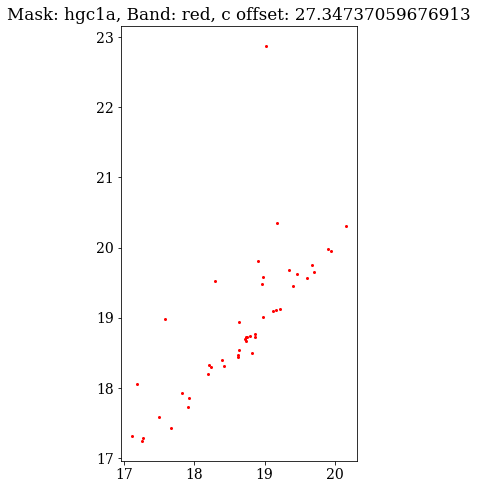

<Figure size 576x576 with 0 Axes>

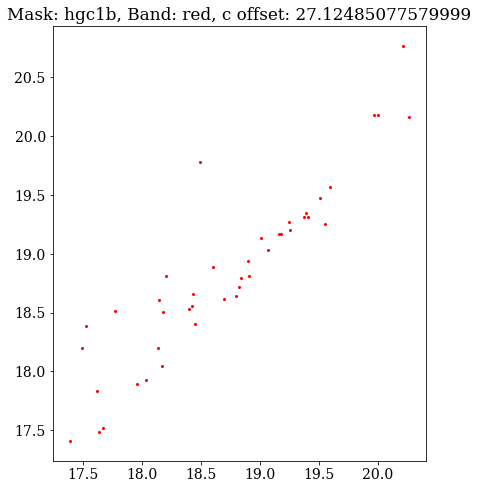

<Figure size 576x576 with 0 Axes>

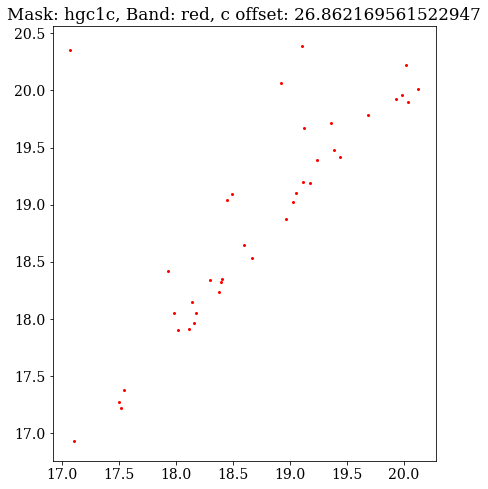

<Figure size 576x576 with 0 Axes>

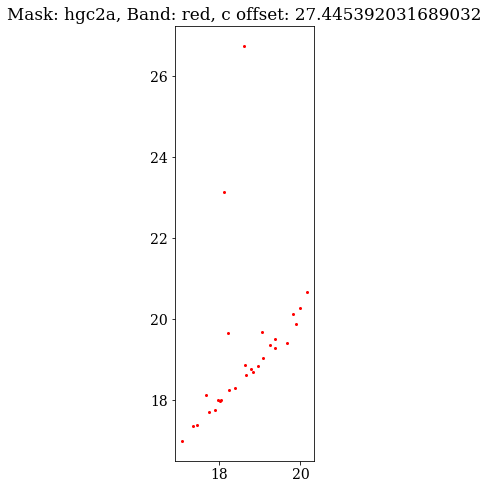

<Figure size 576x576 with 0 Axes>

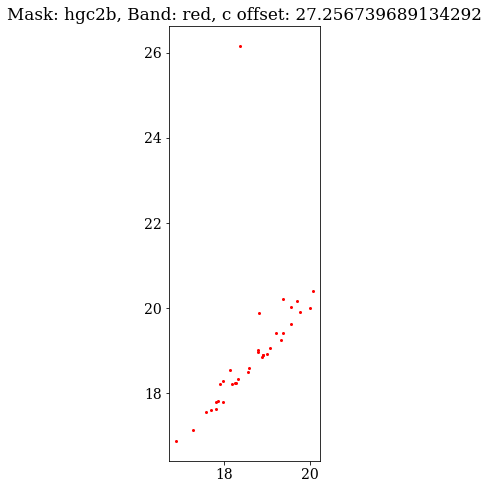

<Figure size 576x576 with 0 Axes>

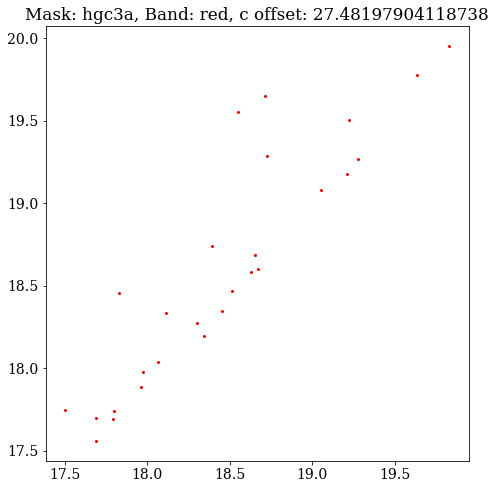

<Figure size 576x576 with 0 Axes>

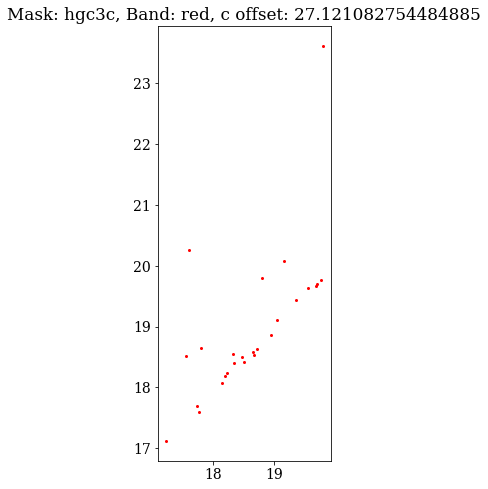

<Figure size 576x576 with 0 Axes>

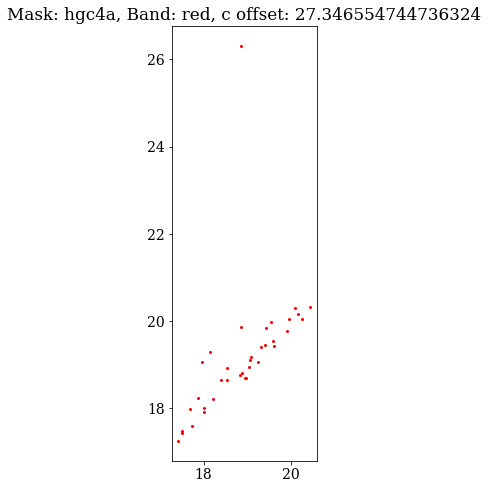

<Figure size 576x576 with 0 Axes>

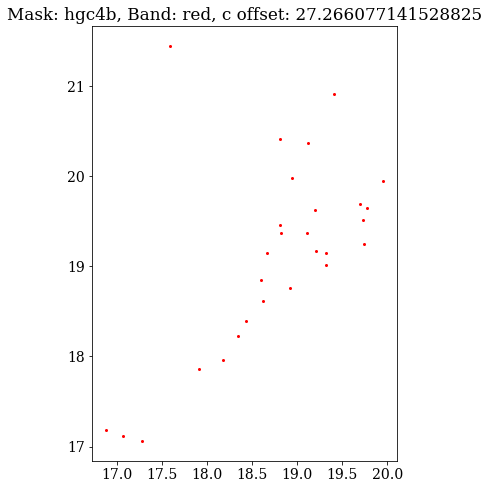

<Figure size 576x576 with 0 Axes>

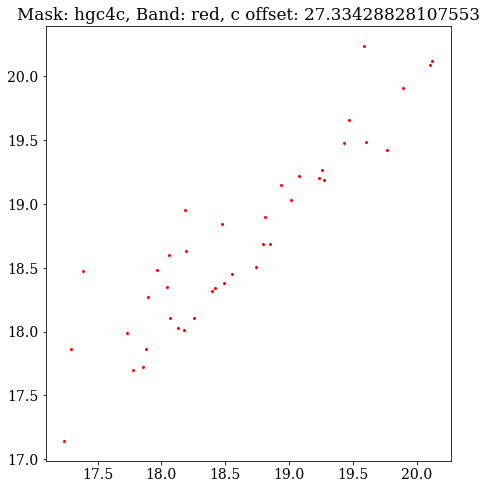

<Figure size 576x576 with 0 Axes>

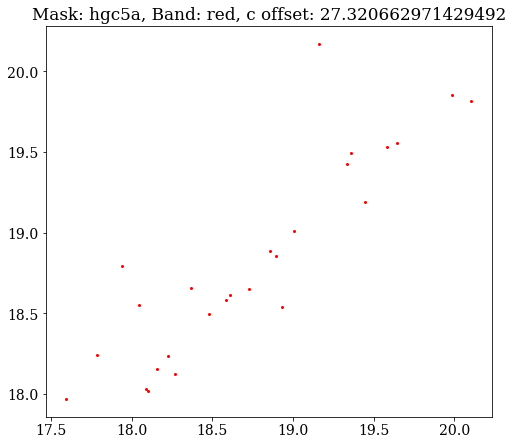

<Figure size 576x576 with 0 Axes>

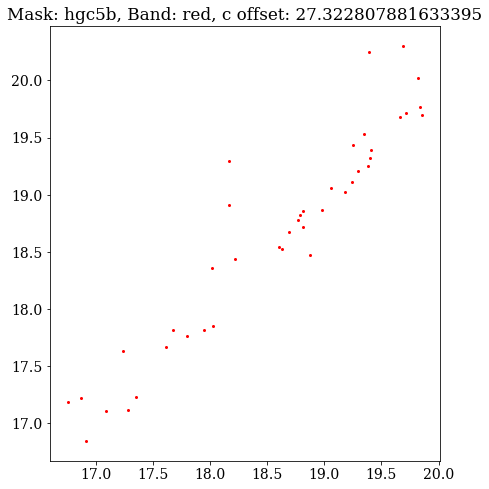

<Figure size 576x576 with 0 Axes>

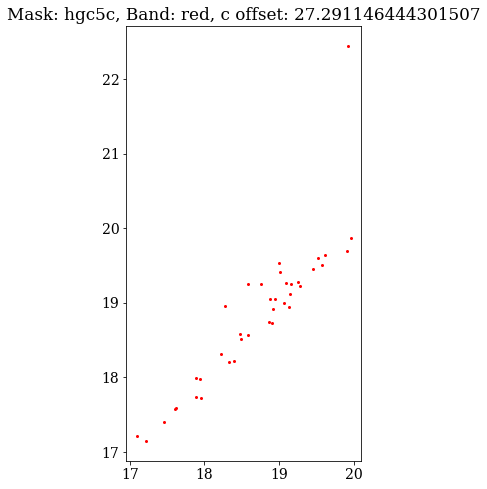

<Figure size 576x576 with 0 Axes>

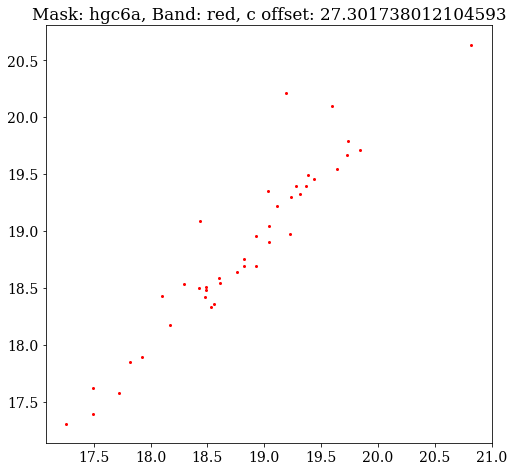

<Figure size 576x576 with 0 Axes>

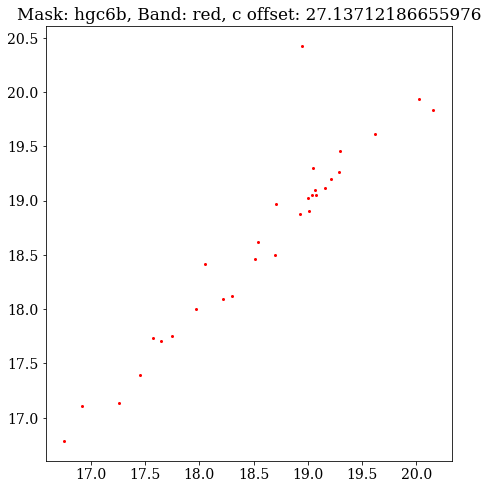

<Figure size 576x576 with 0 Axes>

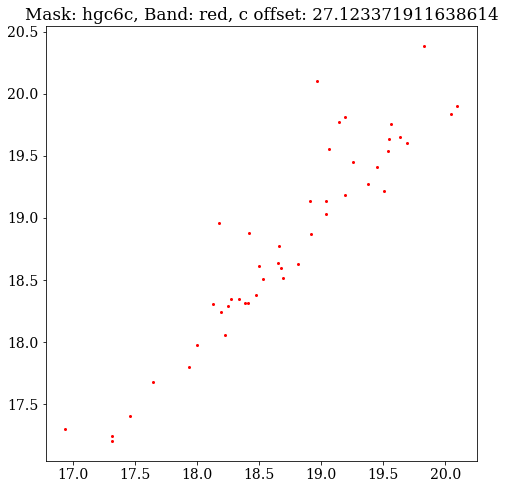

<Figure size 576x576 with 0 Axes>

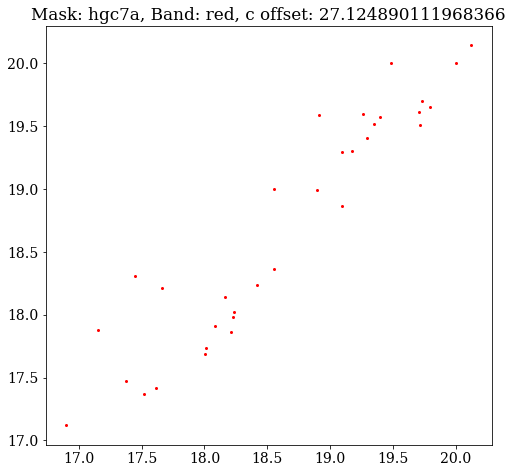

<Figure size 576x576 with 0 Axes>

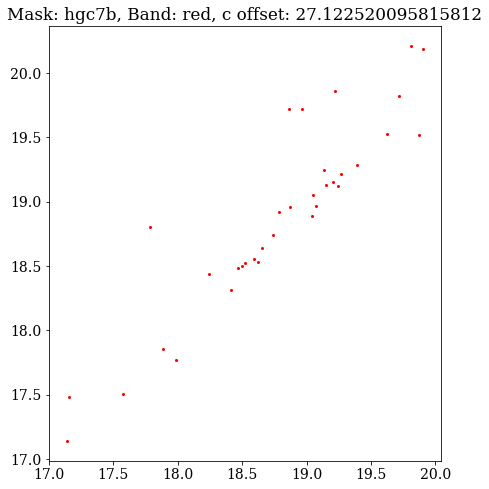

<Figure size 576x576 with 0 Axes>

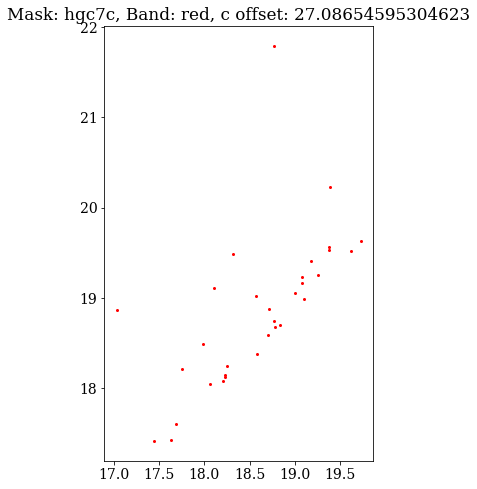

In [82]:
#R band plots and c values by mask
c_values_red = plotbymask(dataR, 'red')

mask: hgc1a, c = 27.769227619424605
mask: hgc1b, c = 27.62753640999169
mask: hgc1c, c = 27.376530898278993
mask: hgc2a, c = 27.8612215701499
mask: hgc2b, c = 27.80906552648081
mask: hgc3a, c = 27.990126761260306
mask: hgc3c, c = 27.648899879819602
mask: hgc4a, c = 27.949051730942664
mask: hgc4b, c = 27.836885304238244
mask: hgc4c, c = 27.915436700663037
mask: hgc5a, c = 27.99101342260272
mask: hgc5b, c = 27.740067563379462
mask: hgc5c, c = 27.927932989379556
mask: hgc6a, c = 27.731148941096706
mask: hgc6b, c = 27.724509771583524
mask: hgc6c, c = 27.700274299963404
mask: hgc7a, c = 27.779948902744373
mask: hgc7b, c = 27.665000595349735
mask: hgc7c, c = 27.56619983143498


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<Figure size 432x288 with 0 Axes>

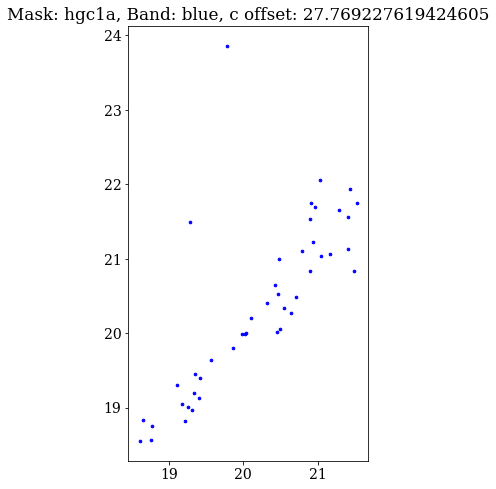

<Figure size 432x288 with 0 Axes>

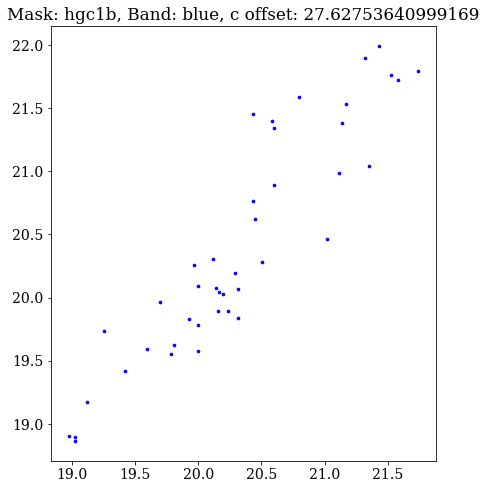

<Figure size 432x288 with 0 Axes>

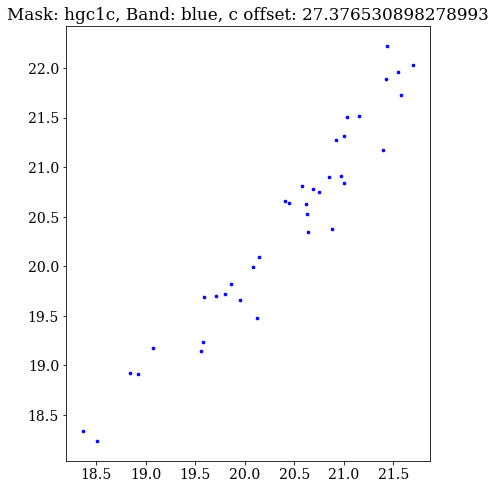

<Figure size 432x288 with 0 Axes>

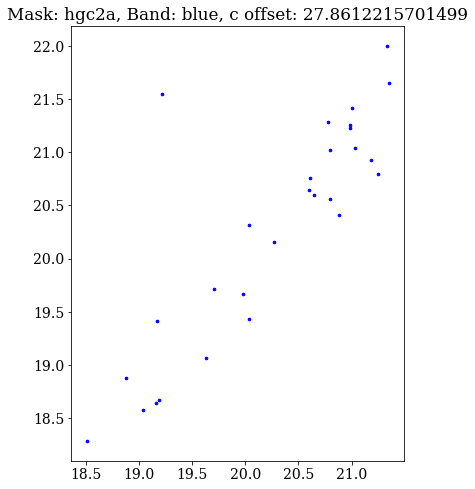

<Figure size 432x288 with 0 Axes>

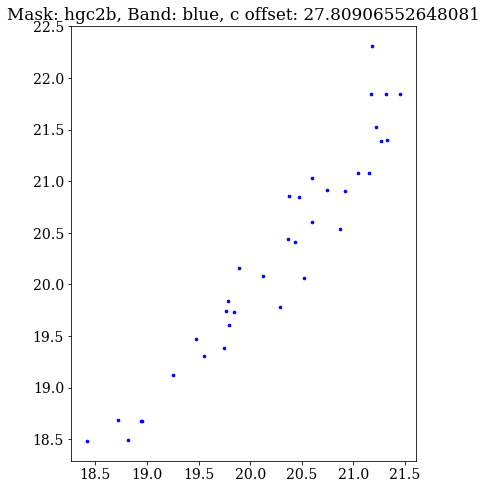

<Figure size 432x288 with 0 Axes>

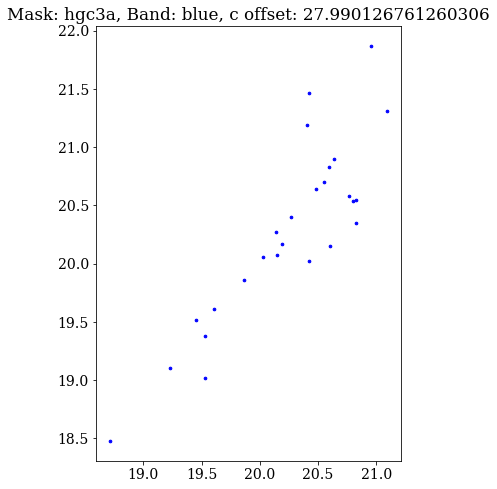

<Figure size 432x288 with 0 Axes>

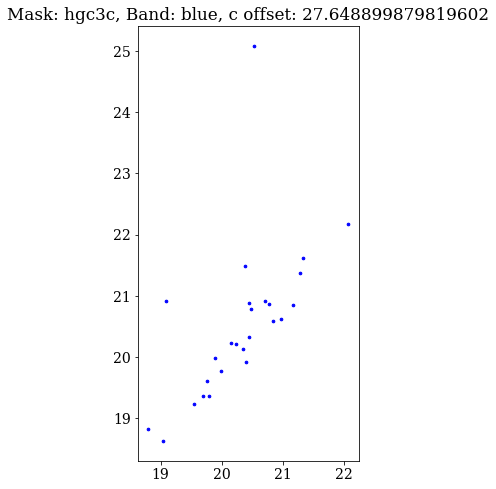

<Figure size 432x288 with 0 Axes>

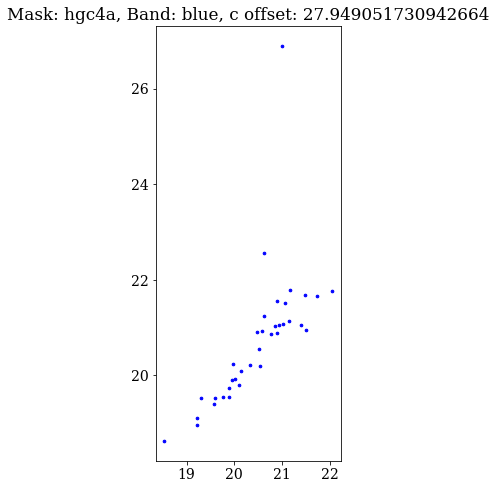

<Figure size 432x288 with 0 Axes>

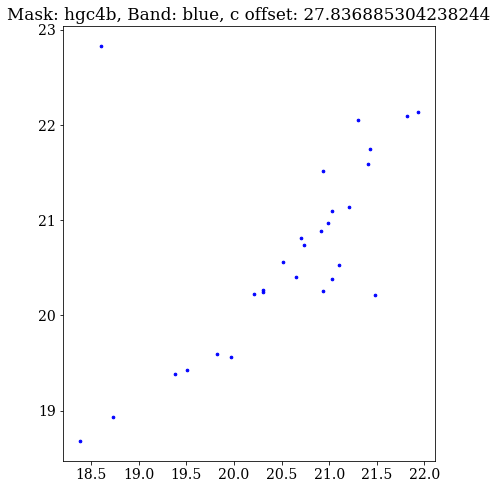

<Figure size 432x288 with 0 Axes>

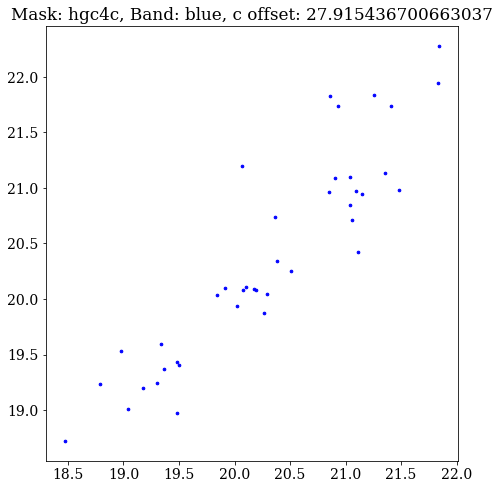

<Figure size 432x288 with 0 Axes>

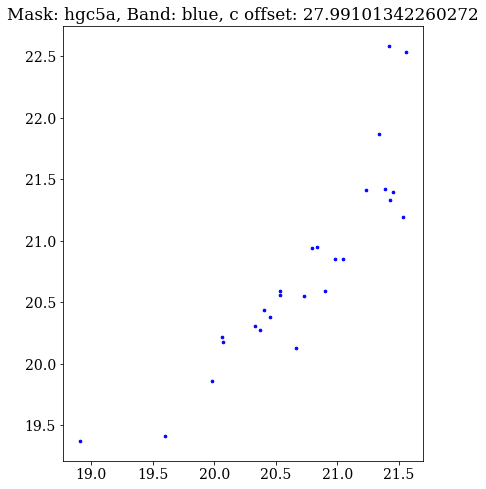

<Figure size 432x288 with 0 Axes>

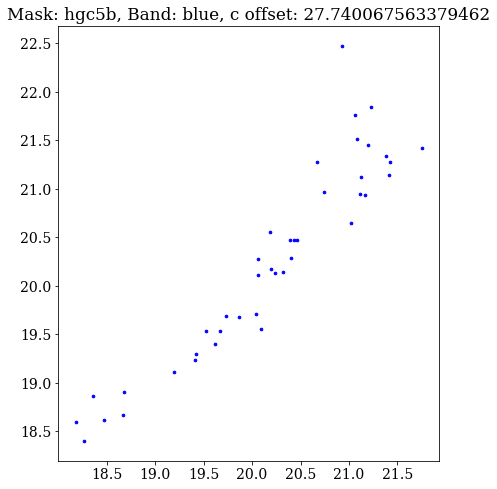

<Figure size 432x288 with 0 Axes>

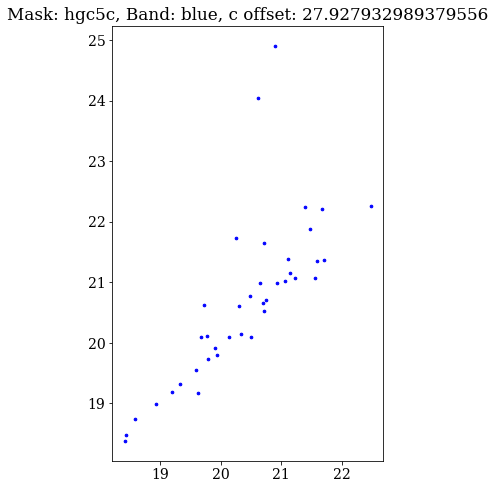

<Figure size 432x288 with 0 Axes>

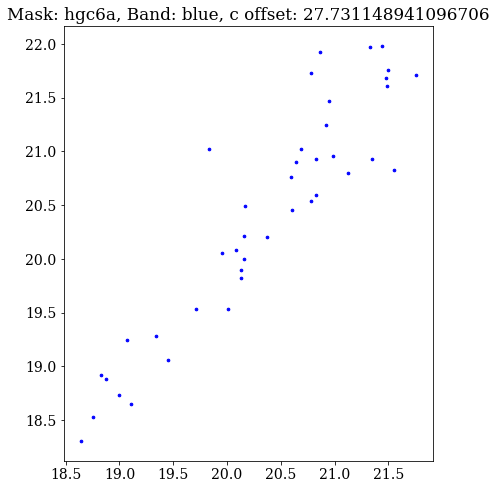

<Figure size 432x288 with 0 Axes>

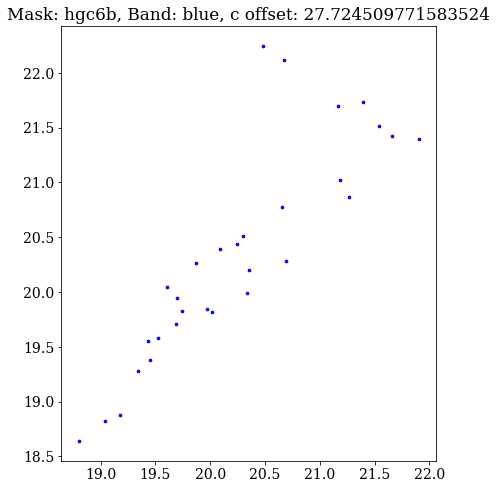

<Figure size 432x288 with 0 Axes>

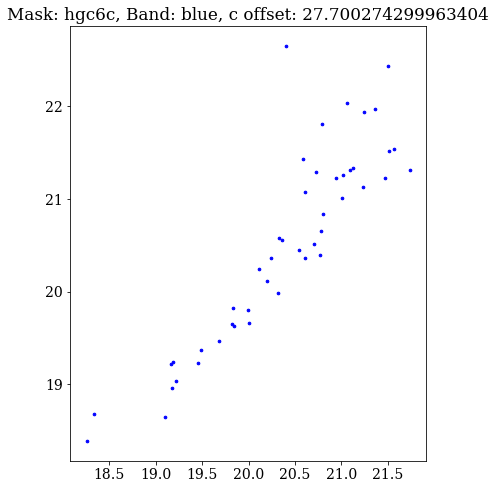

<Figure size 432x288 with 0 Axes>

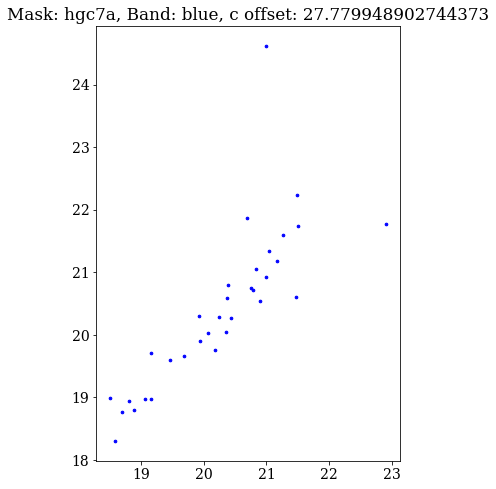

<Figure size 432x288 with 0 Axes>

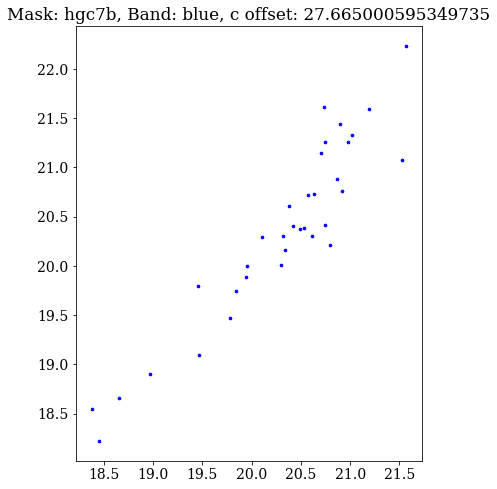

<Figure size 432x288 with 0 Axes>

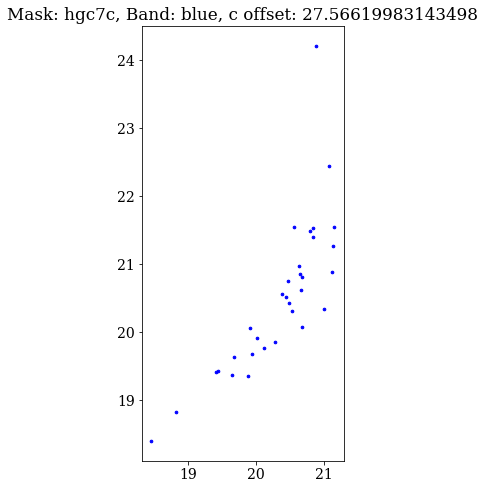

In [16]:
#B band plots and c values by mask
c_values_blue = plotbymask(dataB, 'blue')

mask: hgc1a, c = 27.704551238775167
mask: hgc1b, c = 27.459456156443295
mask: hgc1c, c = 27.21763137697419
mask: hgc2a, c = 27.855045461942733
mask: hgc2b, c = 27.709695121355722
mask: hgc3a, c = 27.80567841536255
mask: hgc3c, c = 27.446216841540853
mask: hgc4a, c = 27.695628607076813
mask: hgc4b, c = 27.527131995646467
mask: hgc4c, c = 27.720696698502664
mask: hgc5a, c = 27.534880217594324
mask: hgc5b, c = 27.65086794547261
mask: hgc5c, c = 27.640631448510405
mask: hgc6a, c = 27.682937190046577
mask: hgc6b, c = 27.411252242601986
mask: hgc6c, c = 27.45118971802682
mask: hgc7a, c = 27.723879003593858
mask: hgc7b, c = 27.54603625532086
mask: hgc7c, c = 27.370049447278845


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<Figure size 432x288 with 0 Axes>

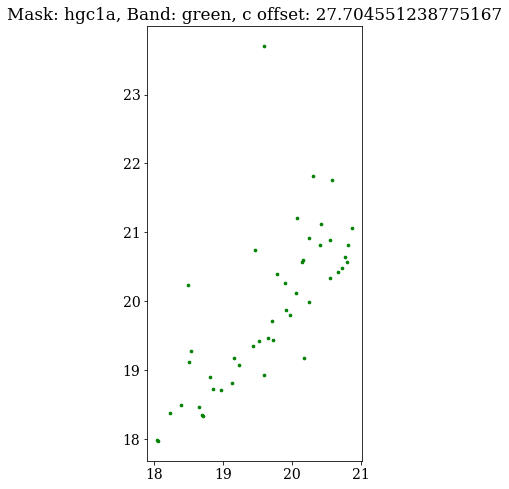

<Figure size 432x288 with 0 Axes>

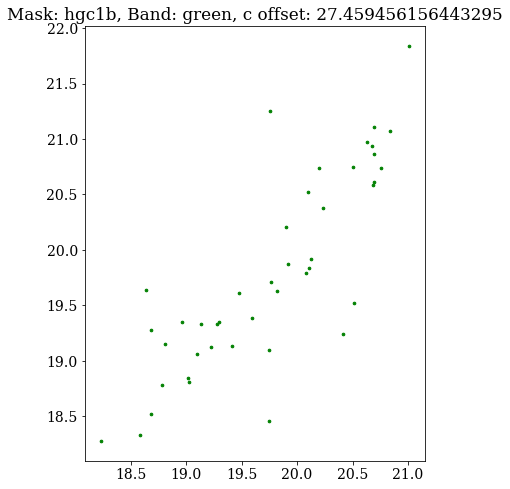

<Figure size 432x288 with 0 Axes>

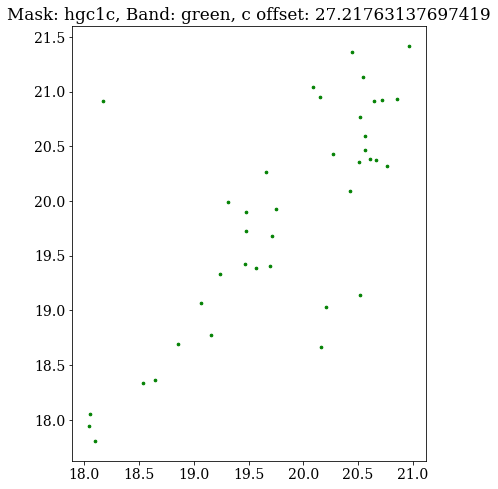

<Figure size 432x288 with 0 Axes>

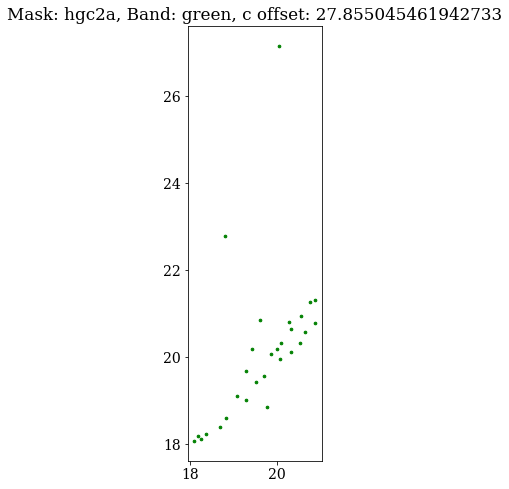

<Figure size 432x288 with 0 Axes>

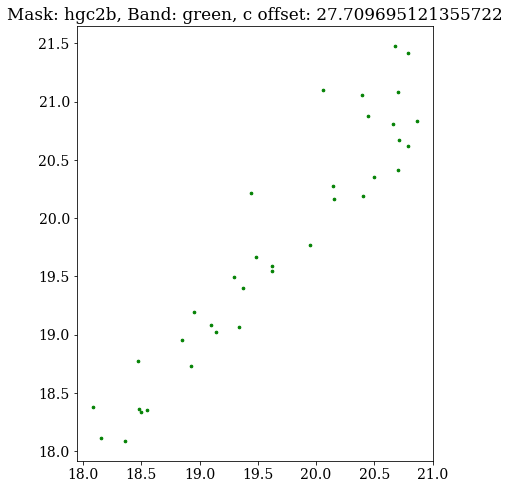

<Figure size 432x288 with 0 Axes>

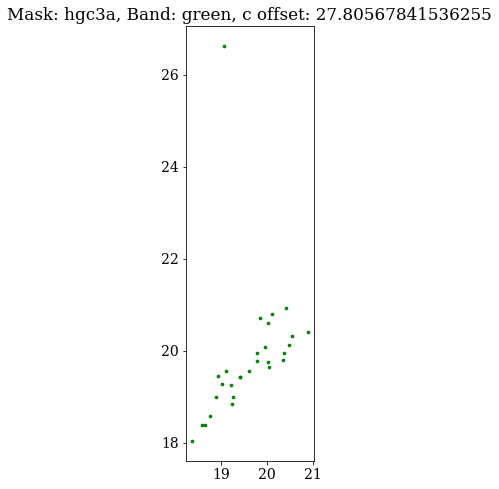

<Figure size 432x288 with 0 Axes>

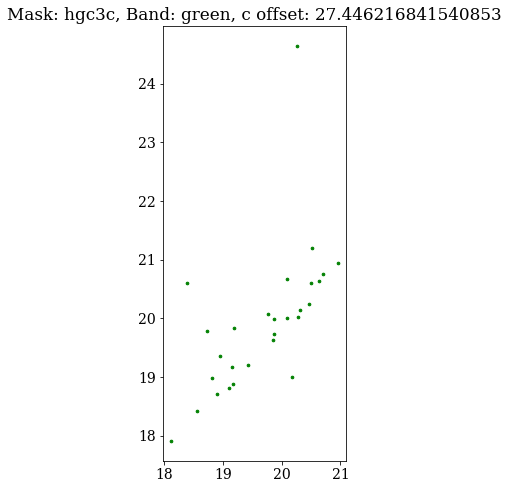

<Figure size 432x288 with 0 Axes>

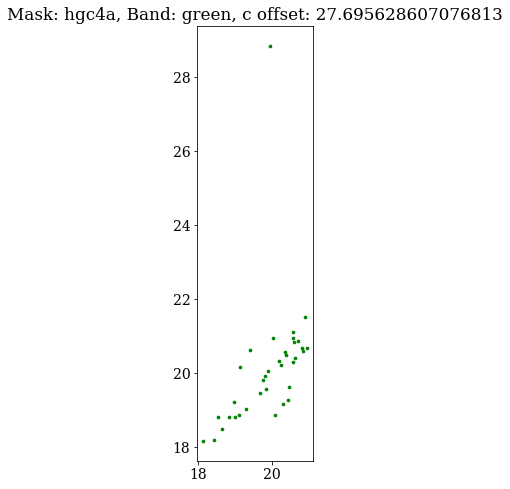

<Figure size 432x288 with 0 Axes>

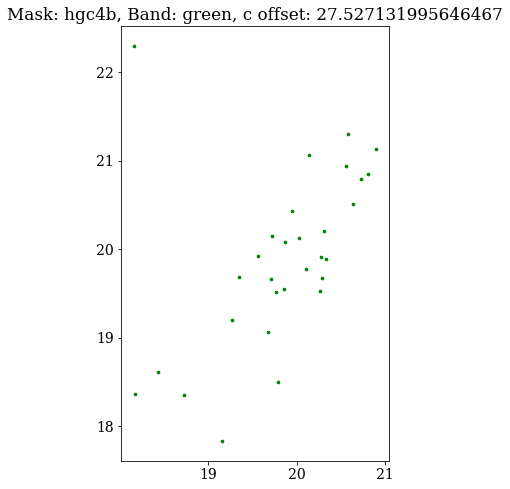

<Figure size 432x288 with 0 Axes>

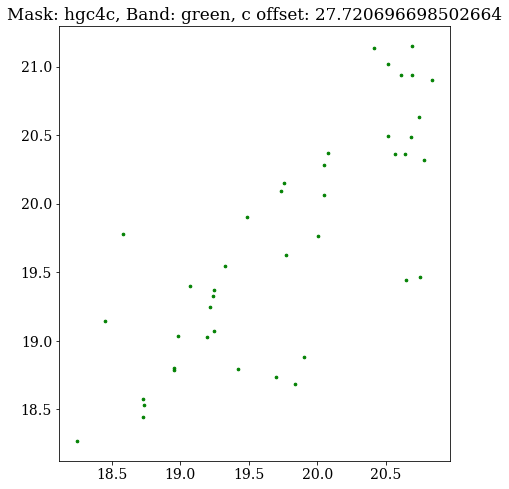

<Figure size 432x288 with 0 Axes>

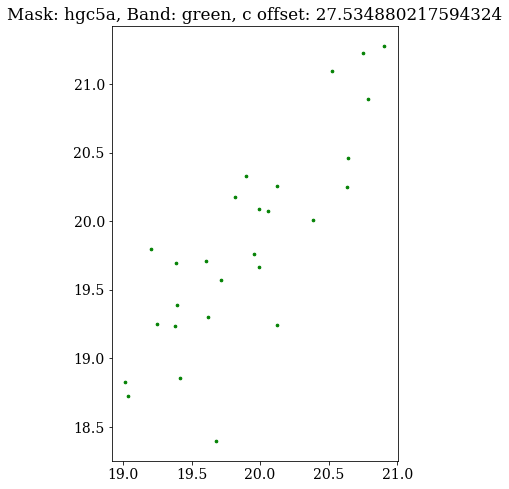

<Figure size 432x288 with 0 Axes>

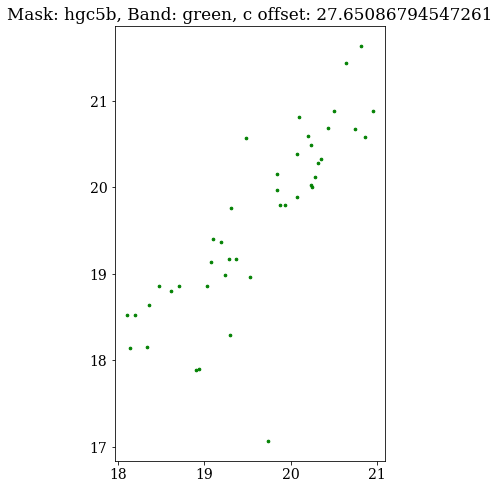

<Figure size 432x288 with 0 Axes>

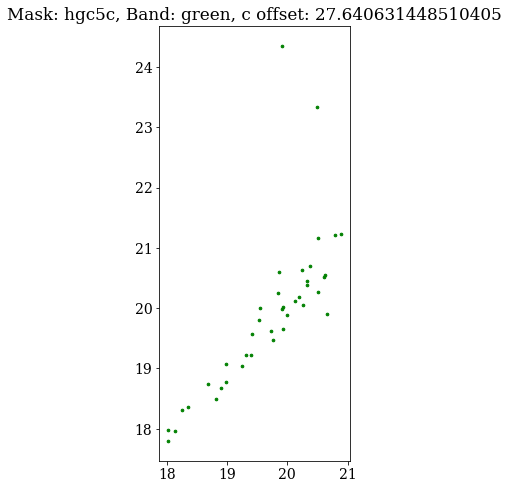

<Figure size 432x288 with 0 Axes>

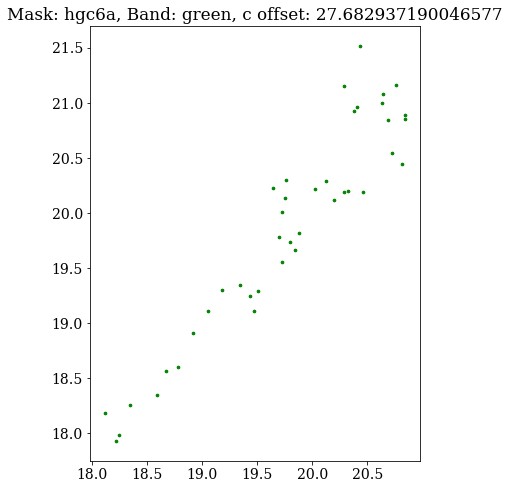

<Figure size 432x288 with 0 Axes>

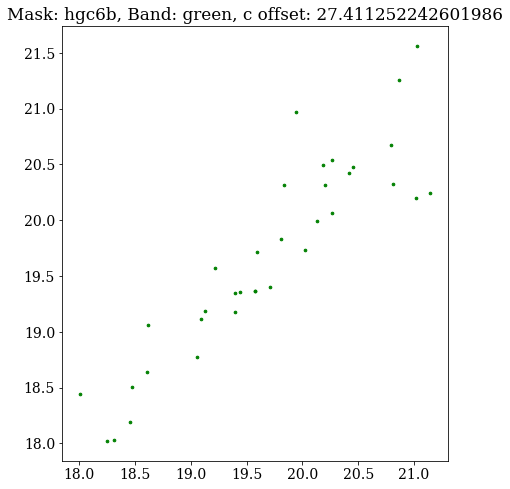

<Figure size 432x288 with 0 Axes>

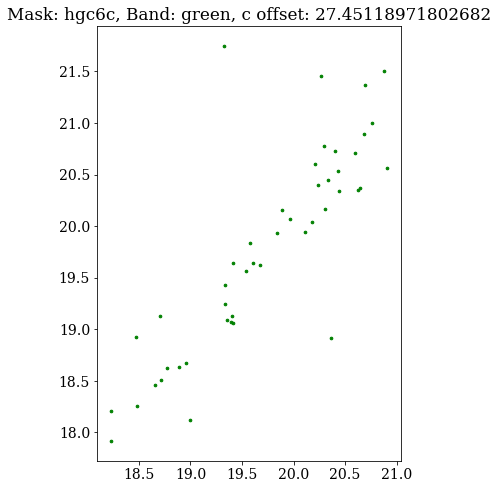

<Figure size 432x288 with 0 Axes>

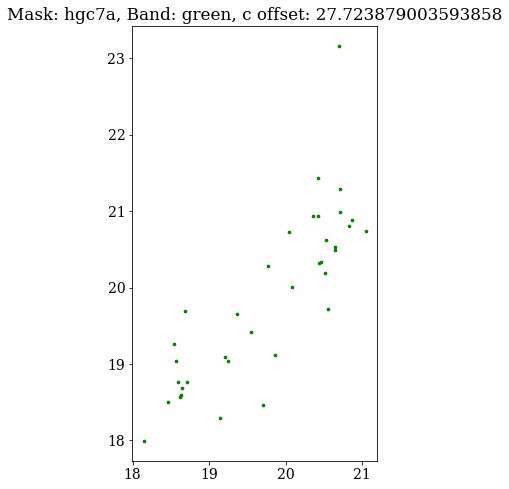

<Figure size 432x288 with 0 Axes>

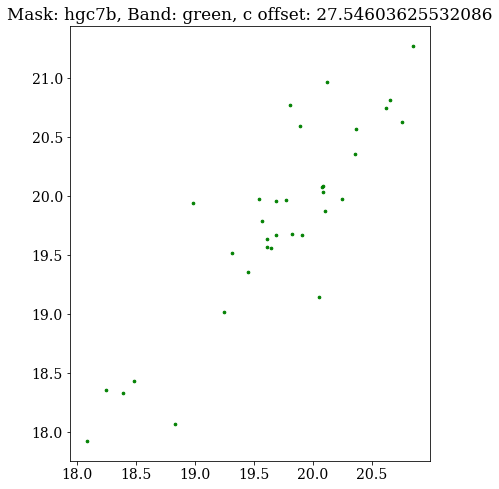

<Figure size 432x288 with 0 Axes>

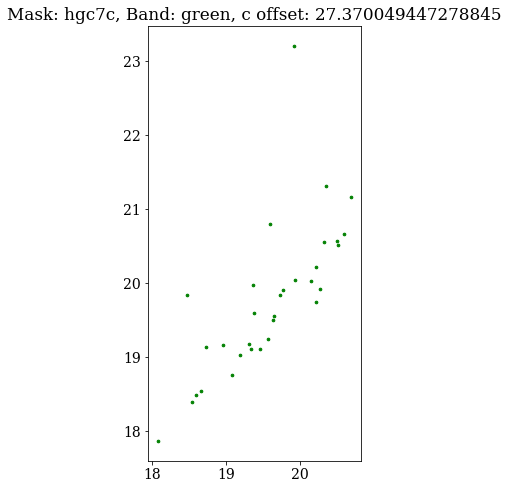

In [17]:
#G band plots and c values by mask
c_values_green = plotbymask(dataG, 'green')

In [18]:
#data extraction for spec1d_airmass_vs_coffset.ipynb

airmassdata = np.genfromtxt('Data/mask_airmass.txt',skip_header=1,dtype=['U16','<f8'], names=['mask','airmass'])

airmassmask = list(airmassdata['mask'])
airmass = list(airmassdata['airmass'])

airmassdict = {}
for n in range(len(airmassmask)):
    airmassdict[airmassmask[n]] = airmass[n]


airmassprocessed = []
for maskname in masknames:
    airmassprocessed.append(airmassdict[maskname])

np.savetxt('Data/airmass_coffset.txt', np.c_[masknames, airmassprocessed,c_values_red,c_values_green,c_values_blue],fmt='%s',header="mask airmass  c_values_red      c_values_green     c_values_blue")

27.34737059676913
27.12485077579999
26.862169561522947
27.445392031689032
27.256739689134292
27.48197904118738
27.121082754484885
27.346554744736324
27.266077141528825
27.33428828107553
27.320662971429492
27.322807881633395
27.291146444301507
27.301738012104593
27.13712186655976
27.123371911638614
27.124890111968366
27.122520095815812
27.08654595304623


<Figure size 864x864 with 0 Axes>

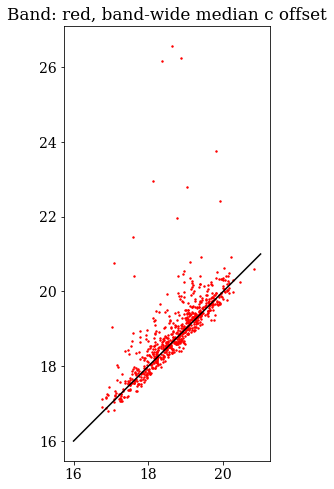

<Figure size 864x864 with 0 Axes>

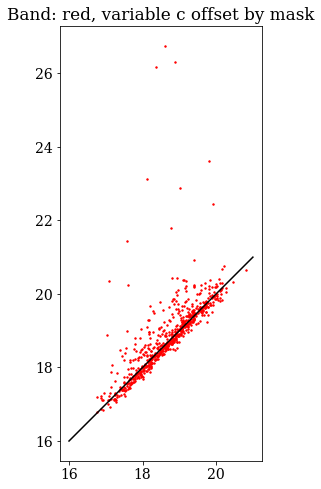

In [92]:
globalplot(dataR, "red", np.median(c_values_red), 16, 21)
globalplotmaskoffset(dataR, "red", c_values_red, 16, 21)

27.704551238775167
27.459456156443295
27.21763137697419
27.855045461942733
27.709695121355722
27.80567841536255
27.446216841540853
27.695628607076813
27.527131995646467
27.720696698502664
27.534880217594324
27.65086794547261
27.640631448510405
27.682937190046577
27.411252242601986
27.45118971802682
27.723879003593858
27.54603625532086
27.370049447278845


<Figure size 864x864 with 0 Axes>

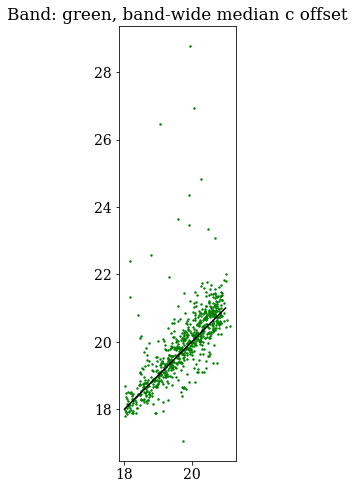

<Figure size 864x864 with 0 Axes>

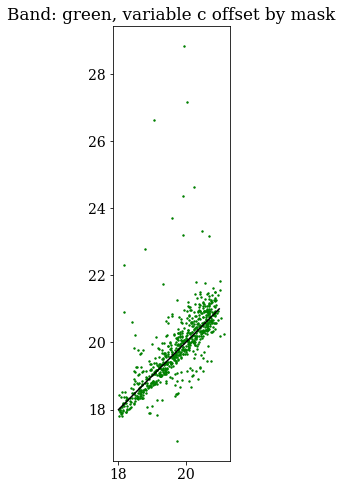

In [93]:
globalplot(dataG, "green", np.median(c_values_green), 18, 21)
globalplotmaskoffset(dataG, "green", c_values_green, 18, 21)

27.769227619424605
27.62753640999169
27.376530898278993
27.8612215701499
27.80906552648081
27.990126761260306
27.648899879819602
27.949051730942664
27.836885304238244
27.915436700663037
27.99101342260272
27.740067563379462
27.927932989379556
27.731148941096706
27.724509771583524
27.700274299963404
27.779948902744373
27.665000595349735
27.56619983143498


<Figure size 864x864 with 0 Axes>

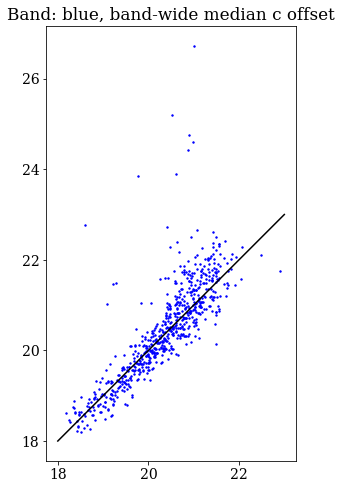

<Figure size 864x864 with 0 Axes>

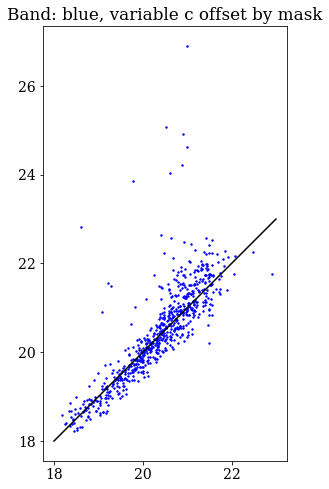

In [94]:
globalplot(dataB, "blue", np.median(c_values_blue), 18, 23)
globalplotmaskoffset(dataB, "blue", c_values_blue, 18, 23)